<h1>Main Task: Identify the influential predictors for house sale price prediction

<h2>1. Explorative and Explanatory Data Analysis

In [14]:
# import the libraries in consideration
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [15]:
houseData = pd.read_csv("C:/Users/HWLOK/Desktop/Portfolio/Python/HouseSalePriceData.csv")

In [16]:
houseData.info()
print("There are {} records and {} attributes in the dataset houseData, ranging from numeric to categorical one.".format(houseData.shape[0], houseData.shape[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### Based on existing research, the following 4 numeric variables are found to be relevant to SalePrice. I simple extract them and have an exploratory and explanatory data analysis.

In [18]:
houseNumData = houseData[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']] 
houseNumData.describe() # provide the descriptive statistics

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,1057.429452,472.980137,180921.195890
std,9981.264932,525.480383,438.705324,213.804841,79442.502883
min,1300.000000,334.000000,0.000000,0.000000,34900.000000
25%,7553.500000,1129.500000,795.750000,334.500000,129975.000000
50%,9478.500000,1464.000000,991.500000,480.000000,163000.000000
75%,11601.500000,1776.750000,1298.250000,576.000000,214000.000000
max,215245.000000,5642.000000,6110.000000,1418.000000,755000.000000


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

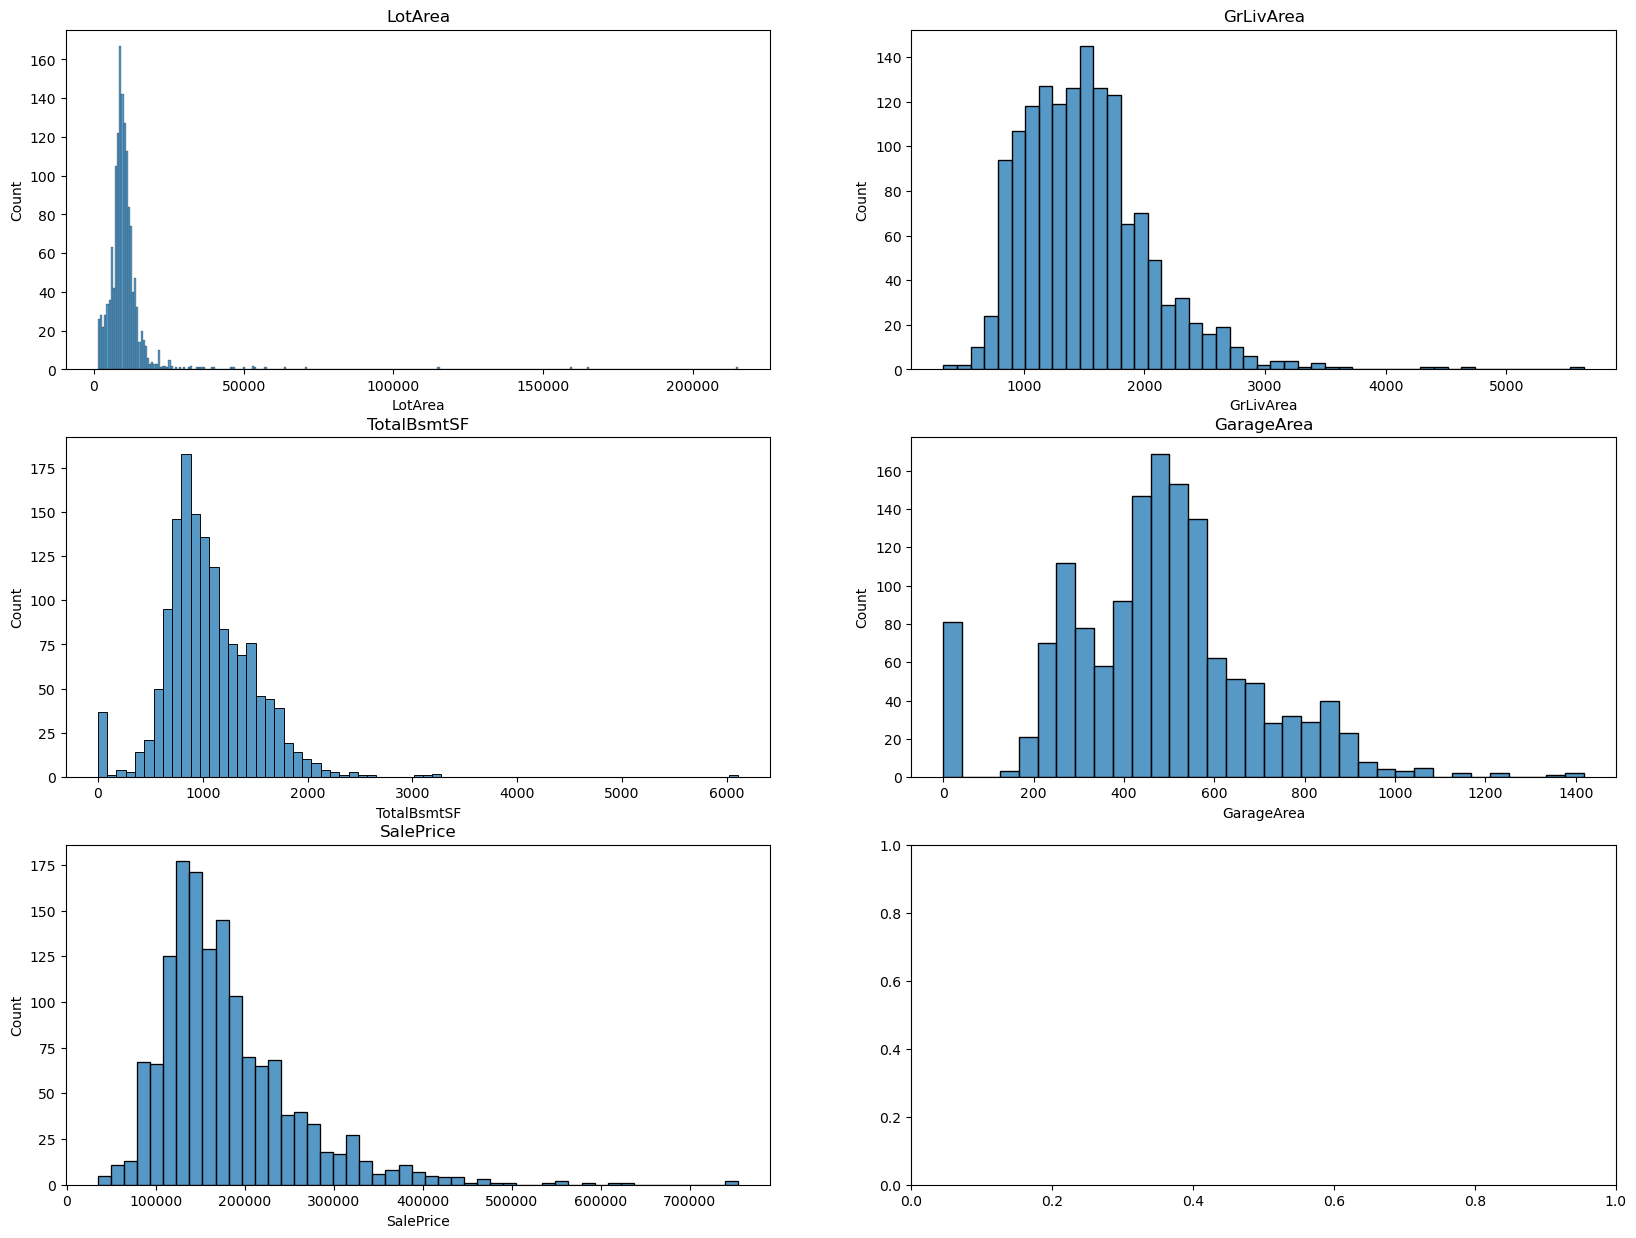

In [19]:
# provide the histograms, using subplots for effective visualization

fig, axes = plt.subplots(3, 2, figsize=(20, 15))

axes = axes.flatten()

for i, col in enumerate(houseNumData.columns):
    sns.histplot(data=houseNumData, x=col, ax=axes[i])
    axes[i].set_title(col)
plt.show()

A normal distribution should be looked like a bell-shape and symmetric along the y-axis.
However, for each numeric variable, there is a fat tail on either of the end.
Only vairiable GarageArea looks like approximately normal but the symmetry is not very obvious.

LotArea        0.263843
GrLivArea      0.708624
TotalBsmtSF    0.613581
GarageArea     0.623431
SalePrice      1.000000
Name: SalePrice, dtype: float64


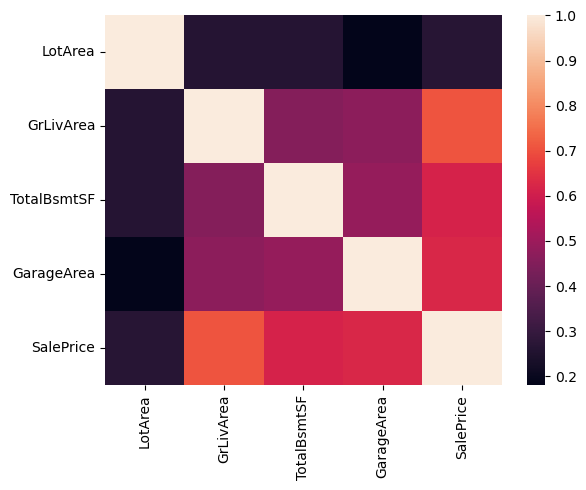

In [21]:
corr = houseNumData.corr()
print(corr["SalePrice"])
sns.heatmap(corr)
plt.show()

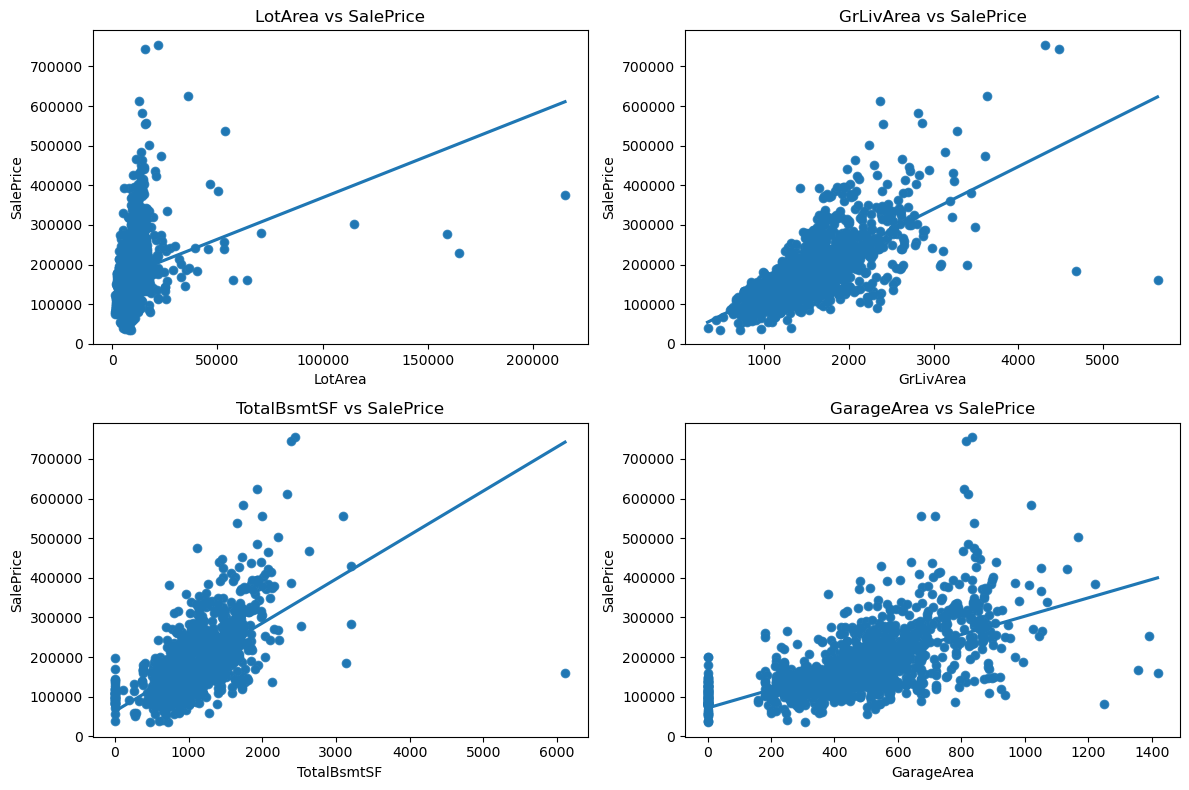

In [22]:
# Create a list of the variables to plot
vars_to_plot = ['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']

# Create the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot the scatterplots with fitted lines
for i, var in enumerate(vars_to_plot):
    row = i // 2
    col = i % 2
    sns.scatterplot(x=var, y='SalePrice', data=houseNumData, ax=axes[row, col])
    sns.regplot(x=var, y='SalePrice', data=houseNumData, ax=axes[row, col], ci=None)
    axes[row, col].set_title(f'{var} vs SalePrice')

plt.tight_layout()
plt.show()

As expected, the 5 numeric variables have sufficient correlation (>=abs(0.25)) to SalePrice and the correlation is positive.<br>
Also, the multi-collinearity problem (prediication model sowngrade problem due to relatively high correlation between predictors) is not obvious.

Based on the existing research, the following 4 categorical variables are found to be relevant to SalePrice.

In [25]:
houseCatData =houseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']]

In [26]:
houseCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   int64 
 1   Neighborhood  1460 non-null   object
 2   BldgType      1460 non-null   object
 3   OverallQual   1460 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 45.8+ KB


Some of the categorical variables are found to be encoded as numeric, and we need to convert them into cateogrical one.

In [28]:
for col in houseCatData.columns:
    if houseCatData[col].dtype != 'object':
        houseCatData[col] = houseCatData[col].astype('object')

C:\Users\HWLOK\AppData\Local\Temp\ipykernel_18004\639670728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houseCatData[col] = houseCatData[col].astype('object')
C:\Users\HWLOK\AppData\Local\Temp\ipykernel_18004\639670728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houseCatData[col] = houseCatData[col].astype('object')


In [29]:
houseCatData.info() # verify the result for categorical type conversion
                    # provide a statistical description on the uniqueness

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   object
 1   Neighborhood  1460 non-null   object
 2   BldgType      1460 non-null   object
 3   OverallQual   1460 non-null   object
dtypes: object(4)
memory usage: 45.8+ KB


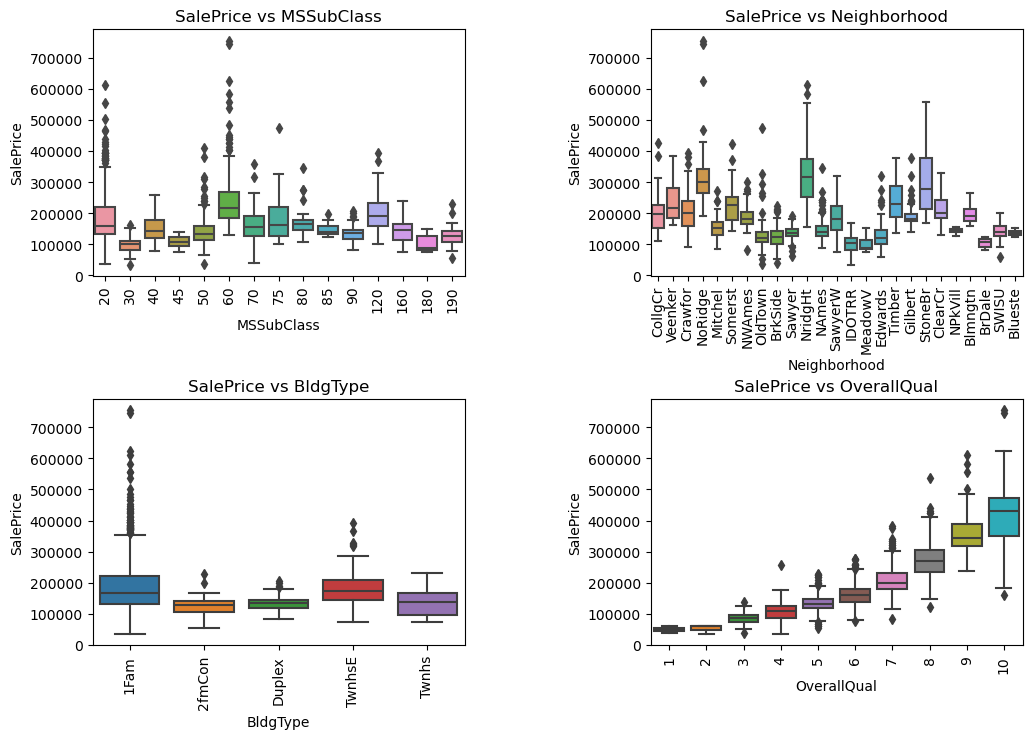

In [30]:
categorical_cols = houseCatData.columns.tolist()

# Create the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

# Plot the boxplots
for i, col in enumerate(categorical_cols):
    sns.boxplot(data=houseCatData, x=col, y=houseData["SalePrice"], ax=axes[i])
    axes[i].set_title(f"SalePrice vs {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("SalePrice")
    axes[i].tick_params(axis='x', rotation=90)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

Among the categorical varaibles, different groups have its own significant distribution to the SalePrice (i.e. they are significant variables).

<H2>2. Identify more influential variables for SalePrice predication.

In [33]:
dropped_cols = ['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual', "Id", "SalePrice"]

others = houseData.drop(dropped_cols, axis = 1)
# the dataset for the features without analyzing in the above sections
# Id attribute is dropped since it is an identifier
others.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1201 non-null   float64
 2   Street         1460 non-null   object 
 3   Alley          91 non-null     object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  Condition2     1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallCond    1460 non-null   int64  
 13  YearBuilt      1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  RoofStyle      1460 non-null   object 
 16  RoofMatl       1460 non-null   object 
 17  Exterior1st    1460 non-null   object 
 18  Exterior

In [34]:
encoded_others = pd.get_dummies(others) # the dataset performed one-hot encoding for regression
encoded_others = encoded_others.fillna(0)

print("The shape of the training set is", encoded_others.shape)
Y = houseData["SalePrice"]

The shape of the training set is (1460, 251)


Also, the number of features is 251 which is very large. I decide to perform one-hot encoding on the categorical variables and plot a correlogram for relationship analysis between SalePrice and the input features. But, now I give up since it is not a good visualization due to big volume.

Besides, I impute the missing values in the training data into zeros (rather than remove the observation with missing value(s)) to avoid data loss.

Also, I perform one-hot encoding for the categorical vairiables for further regression analysis.

<h3>2.1 Lasso Regression

In [37]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_normalized = scaler.fit_transform(encoded_others) # the dataset performed normalization into [0, 1] for lasso regression

In [38]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

lambda_values = [1, 10, 100, 1000] # the choices of lambda parameters
scoring_metric = 'neg_mean_squared_error' # the performance metric in use

# split on training set (70%) and testing set (30%)
X_train, X_val, y_train, y_val = train_test_split(X_normalized, Y, test_size=0.3, random_state=1) 
lasso = Lasso(max_iter = 10000)
param_grid = {'alpha': lambda_values}
grid_search = GridSearchCV(lasso, param_grid, scoring=scoring_metric, cv=5) # perform grid search with 5 folds cross validation
grid_search.fit(X_train, y_train)
best_lambda = grid_search.best_params_['alpha']
print("The best lambda is", best_lambda)

The best lambda is 100


I perform Lasso regression on SalePrice.
The coefficient of the insignificant features will be  shrinked into exactly zero,
indicating the feature is not relevant to the prediction of SalePrice.
First, I normalize the training data into scale [0, 1] to ensure the penalty on coefficients is fair among the features.
Also, I use grid search to find the optimal regularization term lambda (the strength on the regularization).

In [40]:
model = Lasso(alpha=100)
model.fit(X_normalized, Y)
selected_features = encoded_others.columns[model.coef_ != 0]
print("Here is the list of significant features: \n", selected_features)
print("The size of the relevant features is {}".format(selected_features.shape[0]))

Here is the list of significant features: 
 Index(['LotFrontage', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'ScreenPorch',
       'YrSold', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RL',
       'MSZoning_RM', 'Alley_Grvl', 'LotShape_IR2', 'LotShape_Reg',
       'LandContour_Bnk', 'LandContour_HLS', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LandSlope_Mod',
       'Condition1_Norm', 'Condition1_RRAn', 'Condition2_PosN',
       'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_2Story', 'HouseStyle_SLvl', 'RoofStyle_Hip',
       'RoofMatl_ClyTile', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl',
       'Exterior1st_BrkFace', 'Exterior1st_Plywood', 'Exterior2nd_ImStucc',
       'Exterior2nd_Plywood', 'Exterior2nd

The optimal lambda parameter is 100 and I use it to train a Lasso model and visual the features with a non-zero coefficient. <br>
The features with non-zero are considered as significant predictors to the prediction of SalePrice. <br>
The size of the significant feature is 91 which is too large. This feature selection may not be effective and I try to use another method.  <br>
Note that the real size of the significant features is not 91 here. It is because some of the features are obtained by one-hot encoding.

<h3>2.2 Forward Selection

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SequentialFeatureSelector

model = LinearRegression()

sfs = SequentialFeatureSelector(estimator=model, n_features_to_select=10, direction = "forward")

sfs.fit(encoded_others, Y)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=10)

In [44]:
masked = sfs.get_support()
print("Here is the list of significant predictors", encoded_others.columns[masked])

Here is the list of significant predictors Index(['1stFlrSF', '2ndFlrSF', 'KitchenAbvGr', 'GarageCars', 'ExterQual_TA',
       'BsmtQual_Ex', 'BsmtExposure_Gd', 'BsmtFinType1_GLQ', 'KitchenQual_Ex',
       'Functional_Typ'],
      dtype='object')


Forward selection is implemented as the feature selection method. 
I performed a linear regression on SalePrice and choose one additional predictor in each iteration until there are 10 predictors. 
The predictors chosen are the those with the best predictability.
As a result, after decoding from one-hot encoding process, the 10 relevant predictors are '1stFlrSF', '2ndFlrSF', 'KitchenAbvGr', 'GarageCars', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'Functional'.